In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.polynomial.polynomial import Polynomial

In [2]:
def lagrange_polynomial(_x, _y, _input):
    y=0
    n=len(_x)
    for i in range (n):
        product= _y[i]
        for j in range(n):
            if j==i:
                continue
            else:
                product= product * (_input - _x[j])/(_x[i]-_x[j])
        y+= product
    return y

In [3]:
#Plot it
def plot_graph(_x, _y, _X, _Y,  y_actual=None, plot_actual=False,txt_function='Original Function',):
    fig, ax = plt.subplots(figsize=[10,7])

    # First scatter plot the given labelled data
    ax.scatter(_x, _y)

    #Secondly plot the interpolated data
    ax.plot(_X, _Y)

    #If there is a actual Y provided, plot it
    if plot_actual:
        #Legend
        ax.plot(_X, y_actual, 'r')
        ax.legend(['Actual', 'Interpolated', txt_function], fontsize = 12)
    else:
        ax.legend(['Actual','Interpolated'], fontsize = 12)

    fig.suptitle("Lagrange Polynomial Interpolation")
    plt.show()

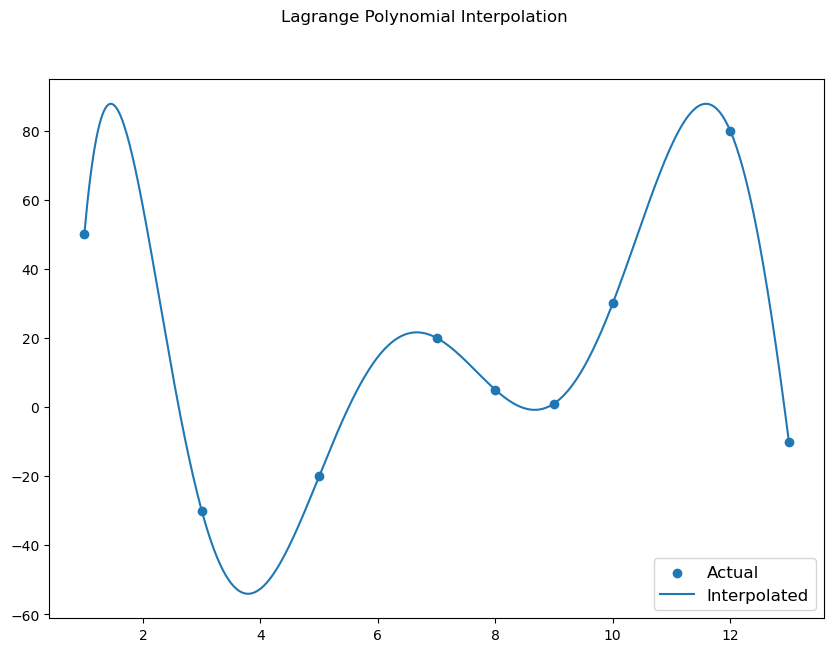

In [83]:
# Data Points
x=[1,3,5,7,8,9,10,12,13]
y=[50,-30,-20,20,5,1,30,80,-10]

n = len(x)-1

num_points = 500

X = np.linspace(min(x), max(x), num_points)
# approx_Y = lagrange_polynomial(x, y, X)
poly = interpolate.lagrange(x,y)

approx_Y = Polynomial(poly.coef[::-1])(X)

plot_graph(x, y, X, approx_Y, txt_function=r'$\phi (x)= sin(2\pi x).cos(5\pi x)$')

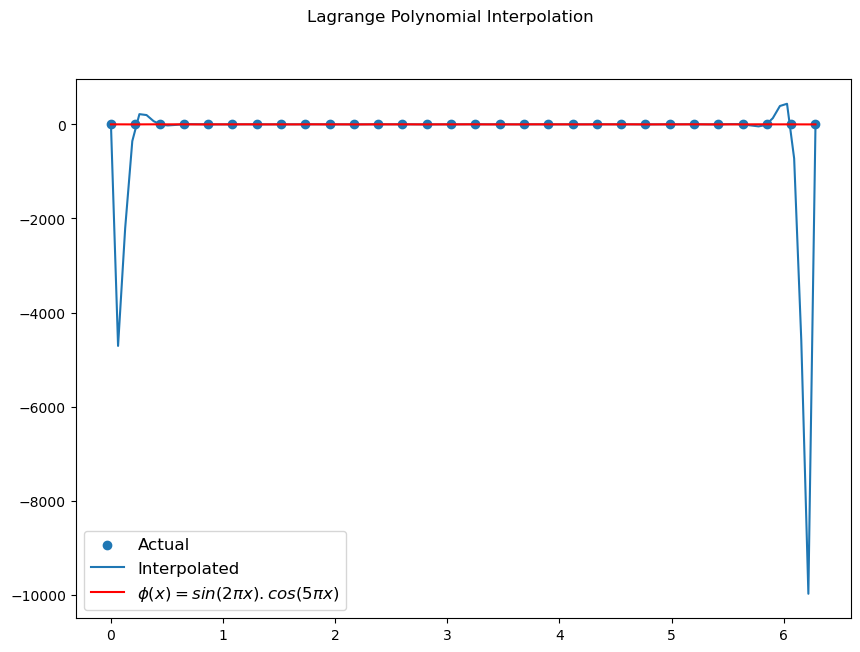

In [86]:
def phi(_X):
    val=np.sin(2*np.pi*_X)*np.cos(5*np.pi*_X)
    return val

num_data_points = 30
# Data Points
x=np.deg2rad(np.linspace(0,360, num_data_points, dtype=np.float128))
y= phi(x)

num_points = 100

X = np.linspace(min(x), max(x), num_points, dtype=np.float128)

poly = interpolate.lagrange(x,y)

# Y = Polynomial(poly.coef[::-1])(X)
Y = lagrange_polynomial(x,y,X)

actual_y = phi(X)

plot_graph(x,y,X, Y, plot_actual=True, y_actual=actual_y, txt_function=r'$\phi (x)= sin(2\pi x).cos(5\pi x)$')

### 

# Plotting the Error

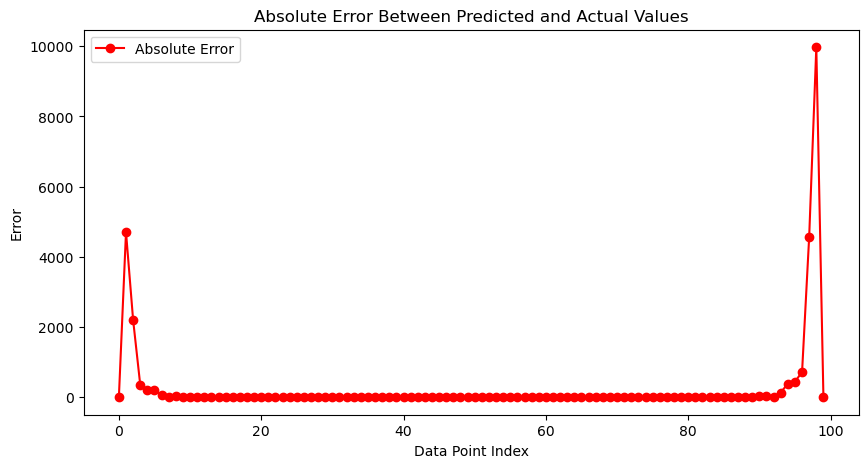

In [6]:
# Calculate absolute error
error = np.abs(actual_y - Y)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(error, marker='o', color='red', linestyle='-', label='Absolute Error')
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.title('Absolute Error Between Predicted and Actual Values')
plt.legend()
plt.show()

# Newtons Method

In [33]:
def grad(a,b):
    if a==0:
        return y[b]
    return (grad(a-1,b)-grad(a-1,a-1))/(x[b]-x[a-1])

def newton_polynomial(_x, _y, _input):
    y=0
    for p in range(len(_x)):
        prodres=grad(p,p)
        for q in range(p):
            prodres*=(_input - _x[q])
        y+=prodres
    return y

In [69]:
def phi(_X):
    val=np.sin(2*np.pi*_X)*np.cos(5*np.pi*_X)
    return val

num_data_points = 30

# Data Points
x=np.deg2rad(np.random.uniform(0,180, num_data_points))
x.sort()
y= phi(x)

num_points = 1000

X = np.random.uniform(min(x), max(x), num_points)
X.sort()

actual_y = phi(X)

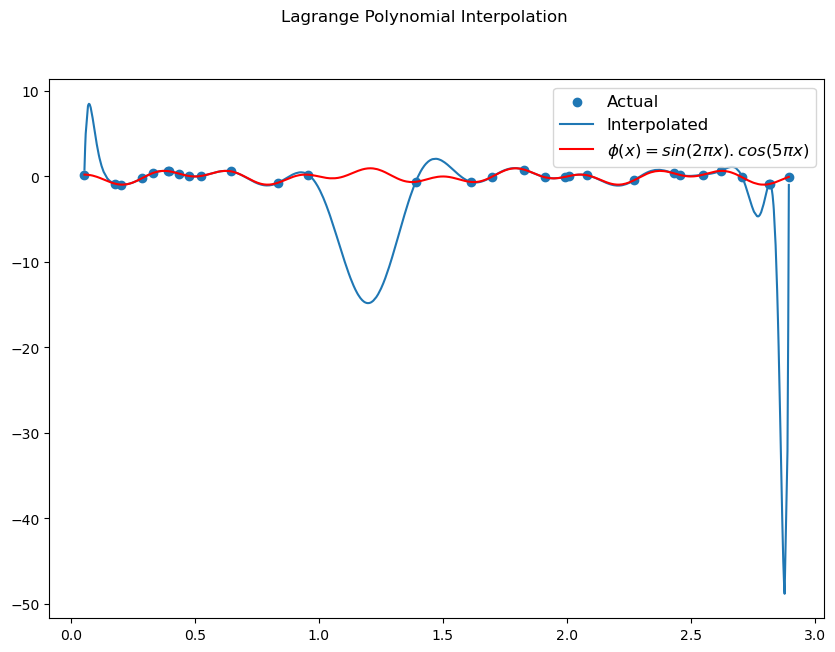

In [70]:
Y = newton_polynomial(x,y,X)

plot_graph(x,y,X, Y, plot_actual=True, y_actual=actual_y, txt_function=r'$\phi (x)= sin(2\pi x).cos(5\pi x)$')

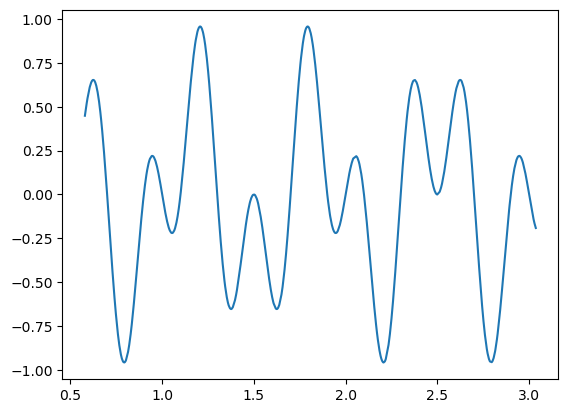

In [68]:
plt.plot(X,actual_y)
plt.show()